In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msn
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingRegressor

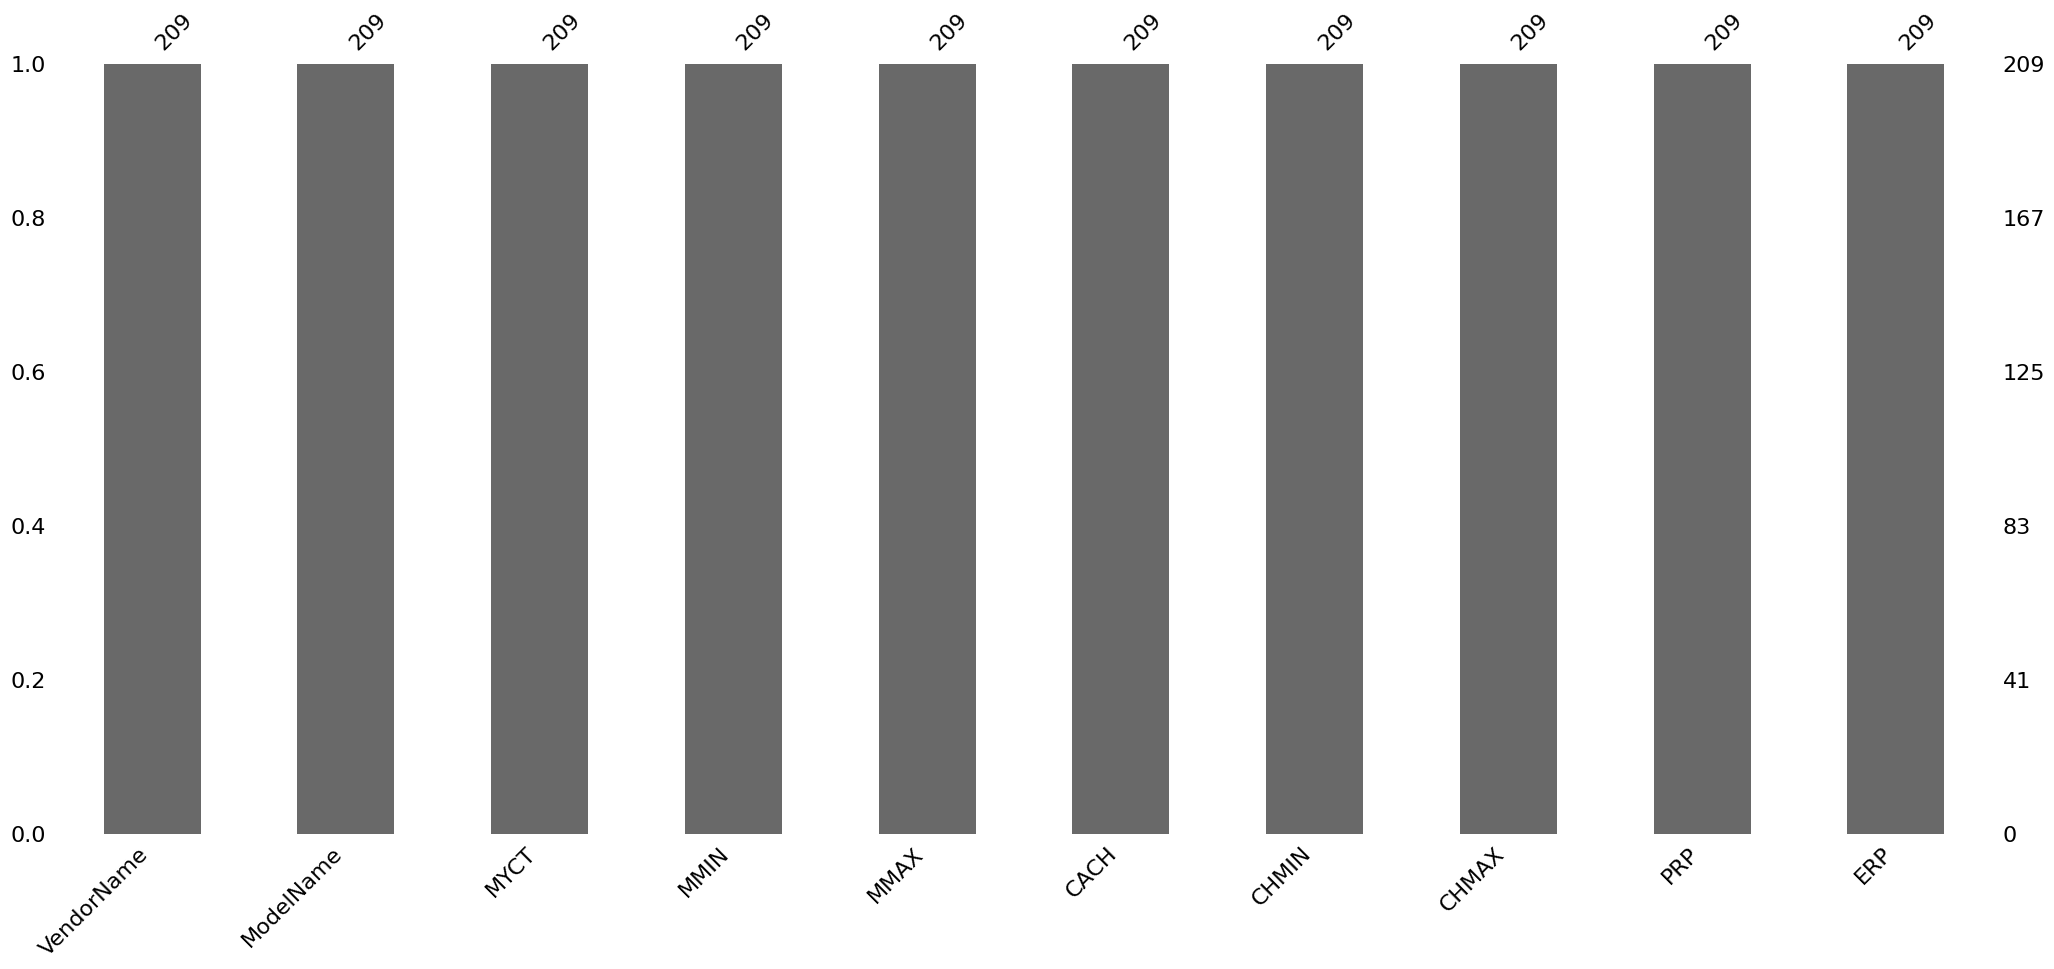

MYCT                    0.307099
MMIN                    0.794931
MMAX                    0.863004
CACH                    0.662641
CHMIN                   0.608903
                          ...   
ModelName_vax:11/730    0.037002
ModelName_vax:11/750    0.028359
ModelName_vax:11/780    0.018852
ModelName_vs-100        0.016691
ModelName_vs-90         0.026198
Name: PRP, Length: 247, dtype: float64


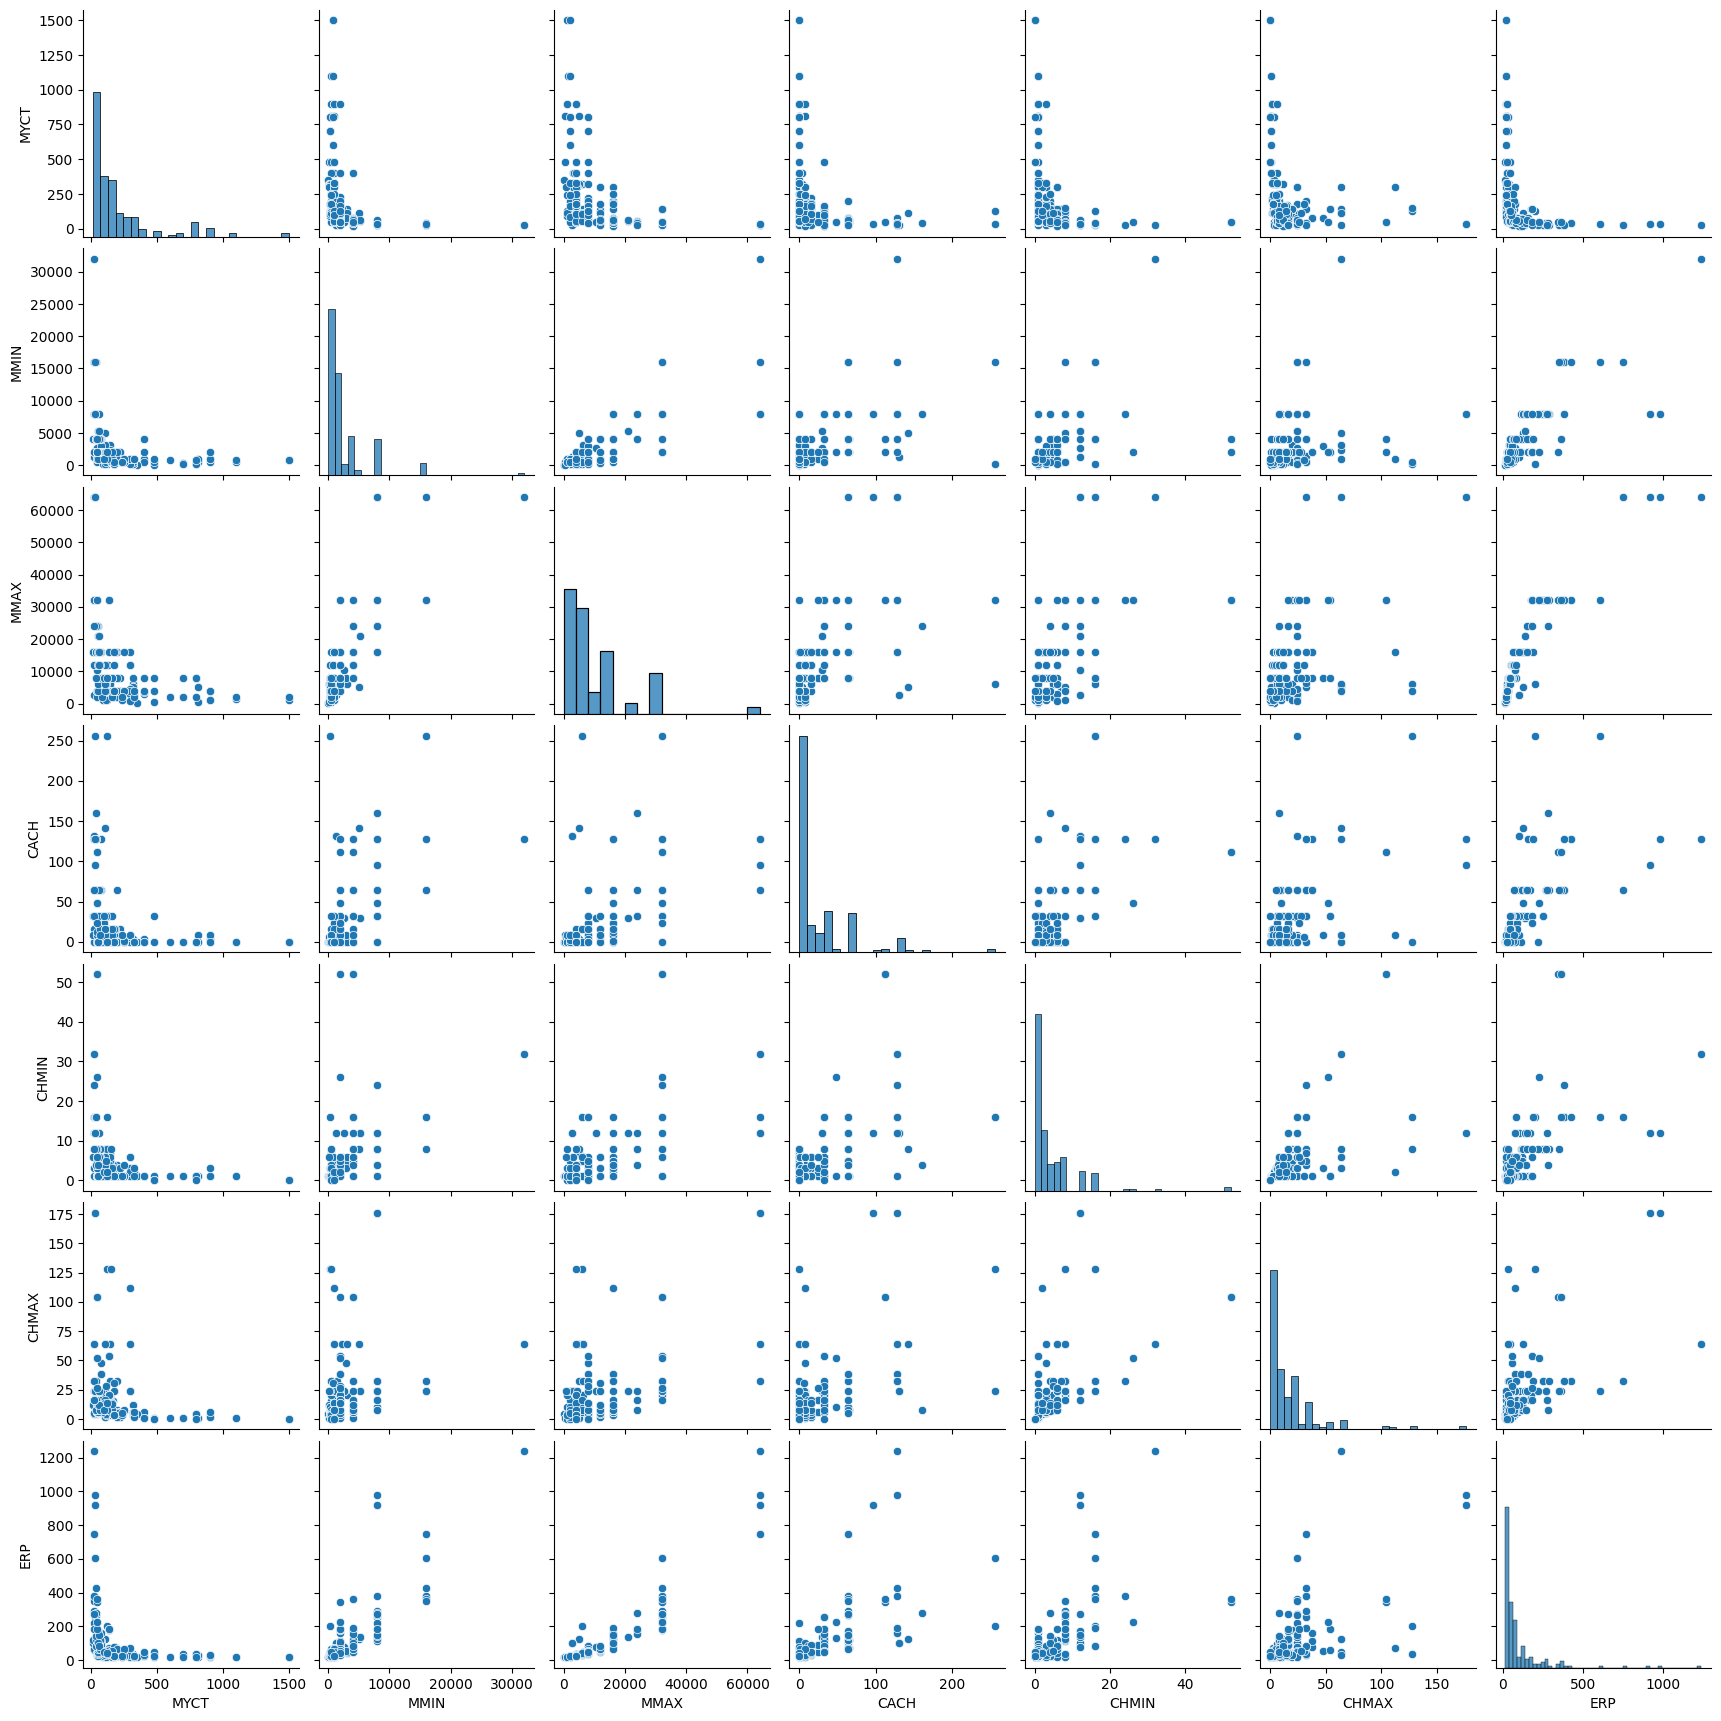

cv_mse: 3433.1185324133176
cv_mae: 34.93370992768254
cv_r2: 0.3898830687100228


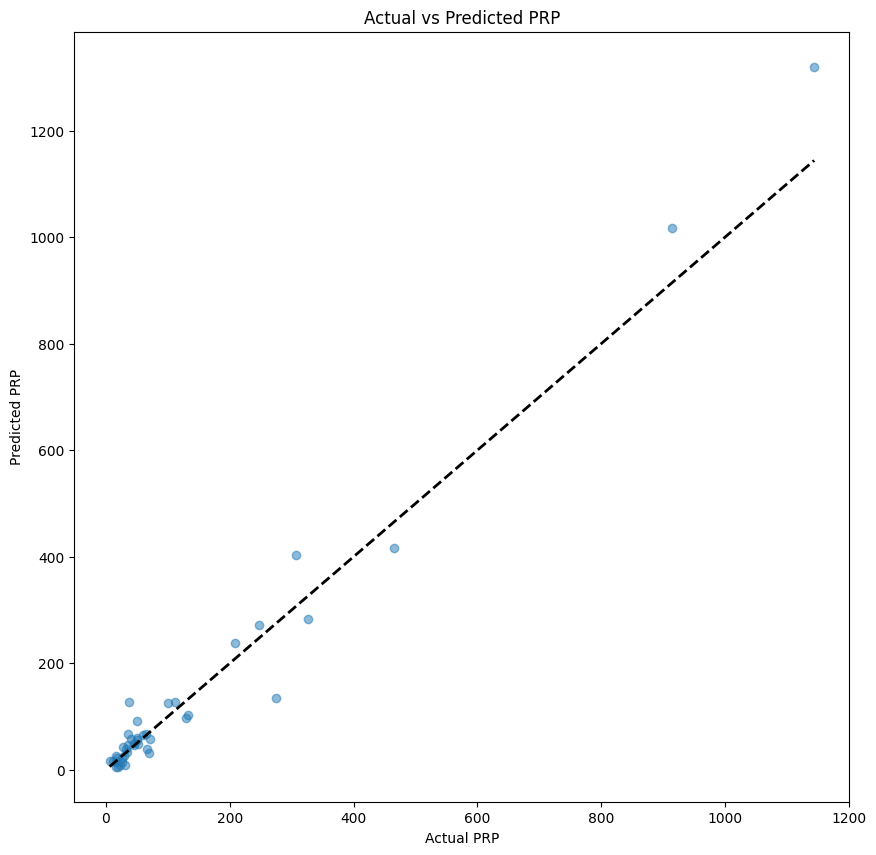

In [8]:
# 데이터 로드
data = pd.read_csv('machine.data_update.csv')

# 결측값 시각화 및 내림차순 정렬
msn.bar(data)
plt.show()
data.dropna(inplace=True)

# 더미 변수 생성
dumm = pd.get_dummies(data, dtype=float)

# 상관 계수 계산 및 출력
prp_results = dumm.corr()['PRP']
prp_results = np.abs(prp_results)
prp_results.sort_values(ascending=False)
print(prp_results)

# 특징 변수 시각화
features = ['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'ERP']
target = data['PRP']
sns.pairplot(dumm[features])
plt.show()

# 특징 및 타겟 변수 설정
X = dumm.drop(columns='PRP')
y = dumm['PRP']

# 학습 및 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 교차 검증
cross_val_scores_mse = cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')
cross_val_mse = -cross_val_scores_mse.mean()
print(f'cv_mse: {cross_val_mse}')

cross_val_scores_mae = cross_val_score(model, X, y, cv=10, scoring='neg_mean_absolute_error')
cross_val_mae = -cross_val_scores_mae.mean()
print(f'cv_mae: {cross_val_mae}')

cross_val_scores_r2 = cross_val_score(model, X, y, cv=10, scoring='r2')
cross_val_r2 = cross_val_scores_r2.mean()
print(f'cv_r2: {cross_val_r2}')

# 분석 결과 시각화
plt.figure(figsize=(10, 10))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.xlabel('Actual PRP')
plt.ylabel('Predicted PRP')
plt.title('Actual vs Predicted PRP')
plt.show()


In [9]:
# 평가 지표 계산
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Training MSE: {mse_train}, MAE: {mae_train}, R2: {r2_train}')
print(f'Testing MSE: {mse_test}, MAE: {mae_test}, R2: {r2_test}')

Training MSE: 1.40577236424337e-22, MAE: 6.33222283656601e-12, R2: 1.0
Testing MSE: 2230.9506004279347, MAE: 28.381347319146762, R2: 0.956175829749757
